In [1]:
import sys
sys.path.append(r"C:\Users\jiayi\Desktop\Kay\Study\Fall2018\cs207\cs207-FinalProject\hotAD")

# hotAD
### A hot new package for Automatic Differentiation

### What is Automatic Differentiaton (AD)?

Automatic Differentiation is a set of techniques to efficiently evaluate the derivatives or gradients of any programmable functions to machine precision.

### Why do we need Automatic Differentiaton (AD)?

Classical methods have limitations:

- Numerical Differentiation: Suffer from truncation and roundoff error
- Symbolicc Deifferentiation: Inefficiency as formula gets complicated and difficulty converting program into
  single formula
    
  Both have problems calculating higher derivatives and partial derivatives.

### How does AD work?

Chain Rule Application:

    No matter how complicated a computer program is, it executes a sequence of elementary arithmetic operations (addition, subtraction, multiplication, division, etc) and elementary functions (Trigonometric functions, logarithms, exponential, power, etc). 
    
    Chain rules are applied repeatedly to achieve automatic calculation.
    
    Below is an example of symbolic representation:
    
$$\frac{dy}{dx} = \frac{dy}{dw_2}\frac{dw_2}{dw_1}\frac{dw_1}{dx} $$ 

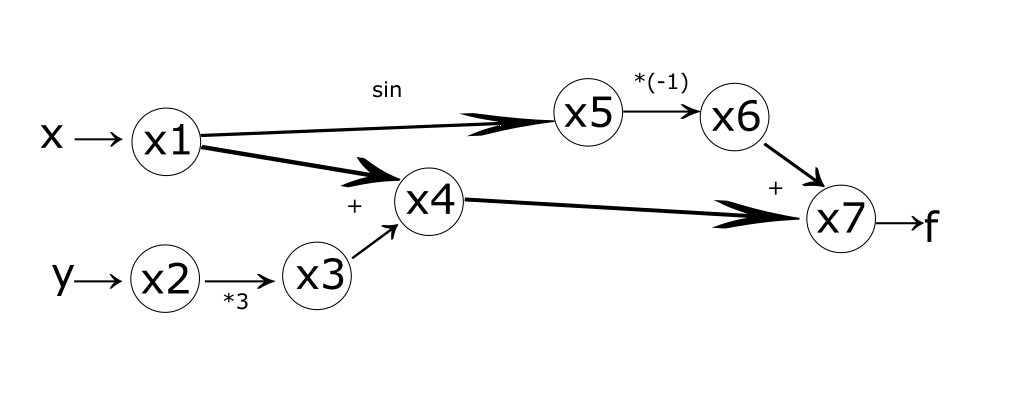

In [2]:
from IPython.display import Image
Image(r"images/eval_table.PNG")

### Package Structure


```
    hotAD\
        hotAD\
            __init__.py
            ADfun.py
            AutoDiffObject.py
            ElementaryFunctions.py
        setup.py
        README.md
        LICENSE
```

## Basic Features

In [3]:
from hotAD.AutoDiffObject import AutoDiff

x = AutoDiff(3, 'x', H=True)
y = AutoDiff(2, 'y', H=True)
f = x*x*y
print('Value:', f.val, '\n1st derivative:', f.der, '\n2nd derivative:', f.der2)

Value: 18 
1st derivative: {'x': 12, 'y': 9} 
2nd derivative: {'x': 4, 'xy': 6, 'yx': 6, 'y': 0}


In [4]:
from hotAD.ElementaryFunctions import ElementaryFunctions as ef

g = ef.sin(x)
print('Value:', g.val, '\n1st derivative:', g.der, '\n2nd derivative:', g.der2)

Value: 0.1411200080598672 
1st derivative: {'x': -0.9899924966004454} 
2nd derivative: {'x': -0.1411200080598672}


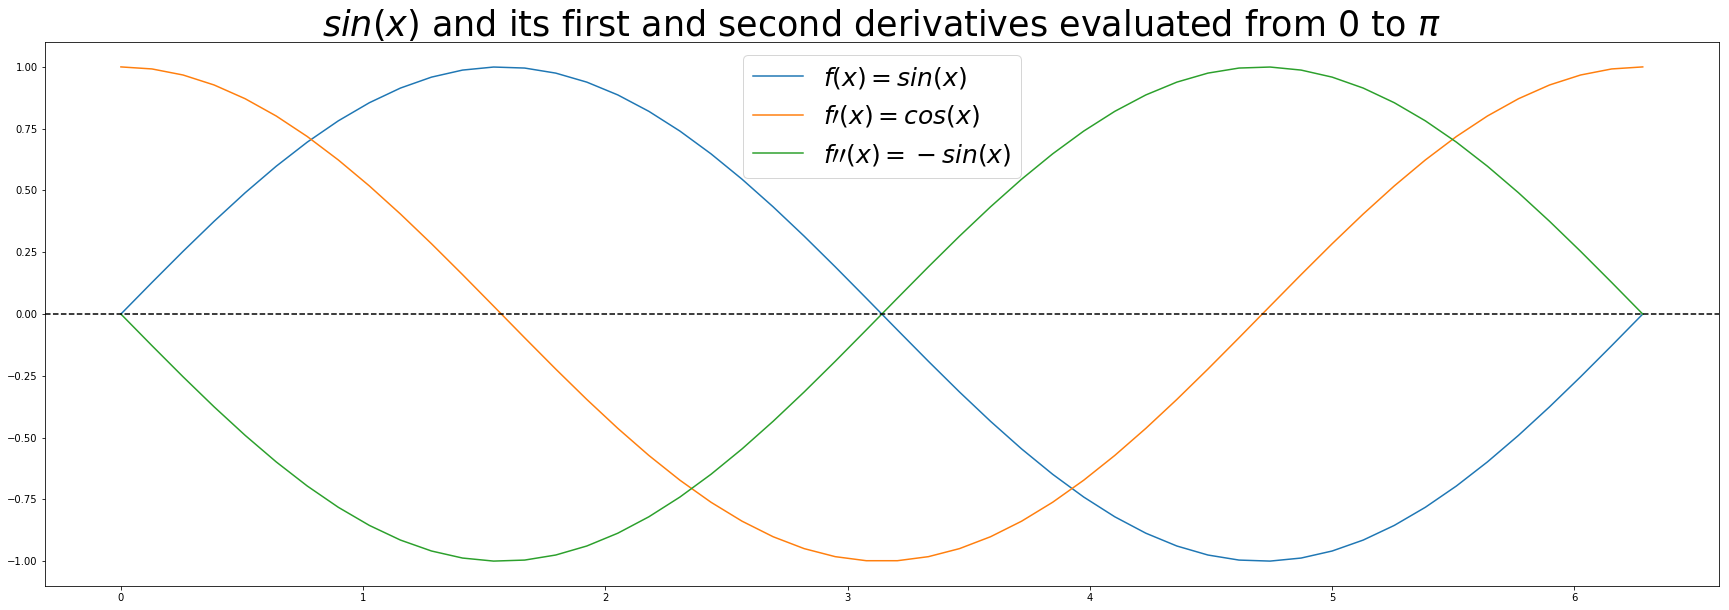

In [5]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

fun_vals = []
der_vals = []
der2_vals = []
for i in np.linspace(0, 2*np.pi):
    x = AutoDiff(i, "x", H=True)
    f = ef.sin(x)
    fun_vals.append(f.val)
    der_vals.append(f.der["x"])
    der2_vals.append(f.der2["x"])
    
plt.figure(figsize=(30,10))
plt.plot(np.linspace(0, 2*np.pi), fun_vals, label=r"$f(x) = sin(x)$")
plt.plot(np.linspace(0, 2*np.pi), der_vals, label=r"$f\prime(x) = cos(x)$")
plt.plot(np.linspace(0, 2*np.pi), der2_vals, label=r"$f\prime\prime(x) = -sin(x)$")
plt.axhline(0,color='black',linestyle='--')
plt.legend(fontsize=25)
plt.title(r'$sin(x)$ and its first and second derivatives evaluated from 0 to $\pi$', fontsize=35)
plt.show()

## Advanced features:
### 1. Root Finding
### 2. Optimization

## Advanced features for implementing numerical methods:
###  <font color='green'> 1. Root Finding</font> 

### 2. Optimization

In [6]:
from hotAD import ADfun as adf

### Roots of a function

Suppose $F: \mathbb{R}^n \rightarrow \mathbb{R}^n$, where $n\ge 1$. 

$F$ is a vector of the form $F = (F_1, F_2, \dots, F_n)$

We seek a root $\mathbf{x} \in \mathbb{R}^n$ such that $F(\mathbf{x}) = \mathbf{0} $.   

### Numerical method to find roots: Newton's method

Suppose we have an initial guess for the root, $\mathbf{x}_0$. 

Then, given the Jacobian of $F$, $J_F$, we can perform linear approximation of the function around the initial guess and solve the linear system for $\Delta \mathbf{x}_0 $, as below:
$$  J_F (\mathbf{x}_0) \cdot \Delta x_0 = - F(\mathbf{x}_0)$$ 
  
Using the value for $\Delta \mathbf{x}_0 $ found, we can update the value of our guess for the root:
$$\mathbf{x}_{1} = \mathbf{x}_0 + \Delta \mathbf{x}_0 $$

Then, we can repeat the above process and iterate until a certain criteria is met (e.g. stop based on absolute step size, $|| \mathbf{x}_{k+1} - \mathbf{x}_k || < 10^{-8}$).



Root finding: Newton   $F : \mathbb{R}^n \rightarrow \mathbb{R}^n$   
(brief math background plz)  

++ demo

### 1.5 minutes

Lipika (killing the puns tonight)

**Additional features:**

Optimization: $F : \mathbb{R}^n \rightarrow \mathbb{R}$  
3 methods:
- Newton -- Lipika
- BFGS -- Kay the literal mastermind behind our additional features
- Gradient Descent  -- Kay aka KWEEN

(brief math background plz)  
++ demo plz  
++ compare 3 methods (maybe using %time?)

### 5 minutes

##  <font color='lightgreen'> Quasi-Newton-BFGS </font>## 
### <font color='lightgreen'> ( a.k.a. Broyden–Fletcher–Goldfarb–Shanno algorithm) </font> ###

## Gradient-Descent ##

**How does BFGS works? **
-  Works the same as Newton's Method
-  Hessian matrix is approximated instead using function gradient information in each step

**Advantage: **
-  Avoid expensive exact calculation of Hessian matrix


**BFGS Example 1: $f(x) = x^2 + 2$ **

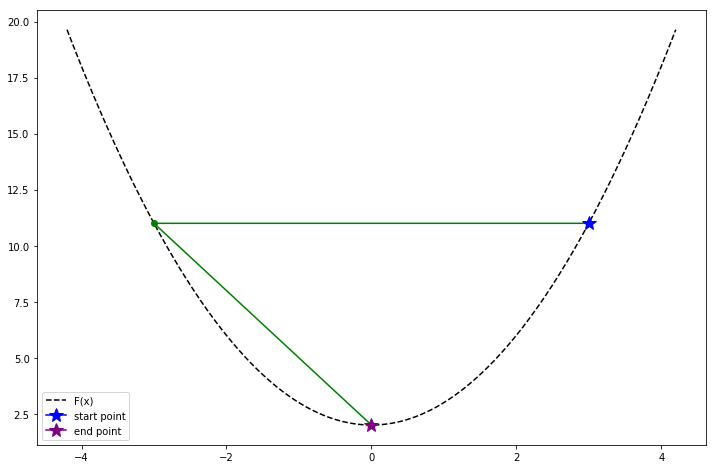

In [34]:
def D(x):
    return [x[0]*x[0] + 2]

bfgs_result1 = adf.Mini(D, [3], plot = True)

In [35]:
print("x min: {}".format(bfgs_result1["x_min"]))
print("F min: {}".format(bfgs_result1["min F(x)"]))
print("number of iterations: {}".format(bfgs_result1["number of iter"]))

x min: [0.]
F min: [2.]
number of iterations: 2


**BFGS Example 2: $f(x, y) = 100(y - x^2)^2 + (1-x)^2$ **

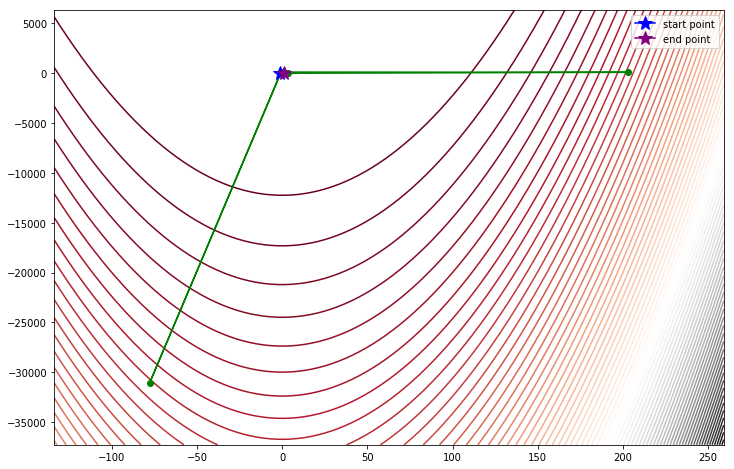

In [36]:
def G(x):
    return [100*ef.power((x[1]-x[0]*x[0]),2) + ef.power((1-x[0]),2)]

BGFS_result = adf.Mini(G, [-1, 0.5], plot = True)

In [37]:
print("x min: {}".format(BGFS_result["x_min"]))
print("F min: {}".format(BGFS_result["min F(x)"]))
print("number of iterations: {}".format(BGFS_result["number of iter"]))

x min: [1. 1.]
F min: [6.26355559e-28]
number of iterations: 75


## Quasi-Newton-BFGS ##


## <font color='lightgreen'> Gradient-Descent </font> ##

**How does Gradient-Descent works? **
-  At $x_k$, function F decreases *fastest* in direction of $-\nabla F(x_k)$
-  Iteration scheme: $x_{k+1} = x_k + \alpha \cdot x_k$, where $\alpha$ is the rate specifying how far $x_k$ should step in the negative gradient direction

**Advantage: **
-  Algorithm is straight-forward and easy to implement


**Gradient-Descent Example 1: $f(x) = x^2 + 2$ **

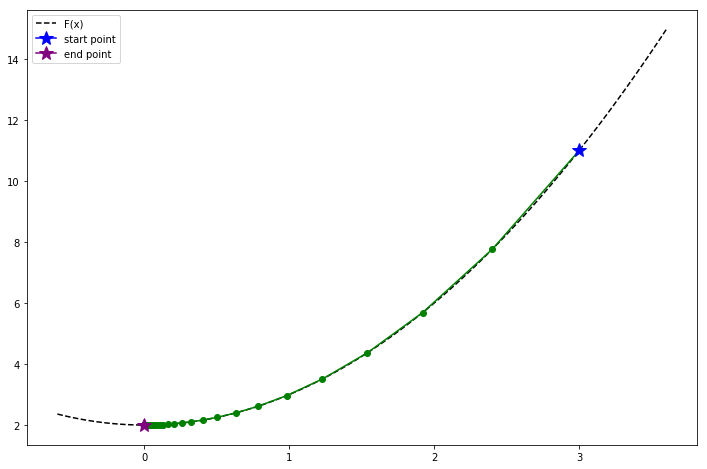

In [38]:
gd_result1 = adf.Mini(D, [3], method = "gradient-descent", rate = 0.1, plot = True)

**Gradient-Descent Example 2: $f(x, y) = 100(y - x^2)^2 + (1-x)^2$ **

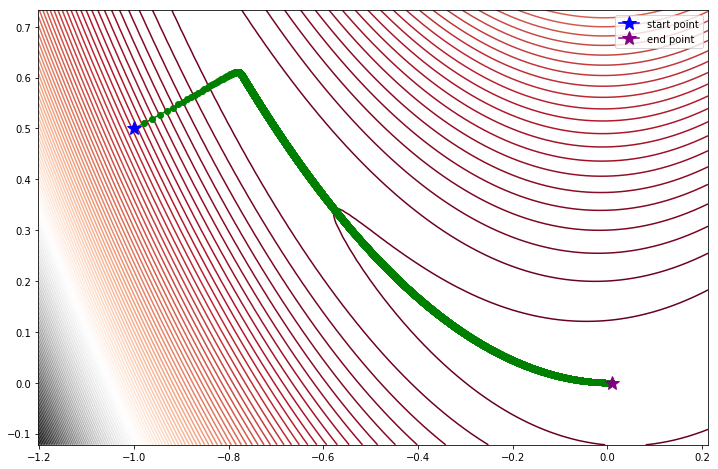

In [39]:
gd_result = adf.Mini(G, [-1, 0.5], method = "gradient-descent", plot = True)

### Optimization Methods Comparison ###
-  Rosenbrock's function $f(x, y) = 100(y - x^2)^2 + (1-x)^2$ 
-  Global minimum of $0$ at $(x, y) = (1, 1)$
-  Initial guess of $(x_0, y_0) = (-1, 0.5)$

In [47]:
newton_result = adf.Mini(G, [-1, 0.5], method = "newton")
print("---------------------------------------Result Comparison------------------------------------")
print("   Items       |          BGFS          |           Newton         |        Gradient-Descent   ")
print("   x_min       |         {}        |           {}        |    {}    ".format(BGFS_result['x_min'], newton_result['x_min'], gd_result['x_min']))
print("   G(x_min)    |  {} |            {}           |      {}   ".format(BGFS_result['min F(x)'][0], newton_result['min F(x)'][0], gd_result['min F(x)'][0]))
print("   # iterations|           {}           |             {}            |             {}    ".format(BGFS_result['number of iter'], newton_result['number of iter'], gd_result['number of iter']))

---------------------------------------Result Comparison------------------------------------
   Items       |          BGFS          |           Newton         |        Gradient-Descent   
   x_min       |         [1. 1.]        |           [1. 1.]        |    [0.01081477 0.0001002 ]    
   G(x_min)    |  6.263555587454834e-28 |            0.0           |      0.9784874471289331   
   # iterations|           75           |             7            |             5000    


## III. Conclusion

- Future work
- Possible Extensions

### 1 minute

Henry the closer

## Some quick examples for y'all

In [3]:
import hotAD

ModuleNotFoundError: No module named 'hotAD'

In [76]:
from hotAD.AutoDiffObject import AutoDiff as ad
from hotAD.ElementaryFunctions import ElementaryFunctions as ef
from hotAD.ADfun import *

In [77]:
x = ad(1, "x", H = True)
b = ad(3, "b", H = True)

In [78]:
y = ef.sin(x) * b + ef.power(b, 2) * x

In [79]:
y.val, y.der, y.der2

(11.524412954423688,
 {'b': 6.841470984807897, 'x': 10.620906917604419},
 {'b': 2.0,
  'bx': 6.54030230586814,
  'xb': 6.54030230586814,
  'x': -2.5244129544236893})

To get the Jacobian:

$$ f:\mathbb{R}^n \rightarrow \mathbb{R}^m $$

Define $f$  
  $$ f:\mathbb{R}^2 \rightarrow \mathbb{R}^3 $$

  $$f_1 = e^{x_1^2} + x_3 sin(x_1x_2)$$
  $$f_2 = x_1 \times x_2$$

In [80]:
x = [2, 0.4]

In [81]:
def f(x):
    return [ef.exp(x[0]) + x[1] * ef.sin(x[0]*x[1]), x[1] * x[0]]

In [82]:
f_eval, jacobian = J_F(f, x)

In [83]:
f_eval, jacobian

(array([7.67599854, 0.8       ]), array([[7.50052917, 1.27472146],
        [0.4       , 2.        ]]))

## Future Work:

- Expand optimization algorithms:
    - Steepest Descent
    - Simulated Annealing
    
- Support AD reverse mode
- Develop backpropagation with reverse mode